In [27]:
from denovo_utils.parsers.converters import DenovoEngineConverter
import seaborn as sns

from psm_utils import PSMList, PSM
import pandas as pd
import os

from glob import glob

from pyteomics import mgf
from pyteomics.mztab import MzTab

count=0

for result in glob("/home/samva/Doctorate/data_directory/denovo_project/denovo_results/contranovo/*.mztab"):
    f = pd.DataFrame(MzTab(result_path).spectrum_match_table).set_index("PSM_ID").reset_index().reset_index()
    if "some value" in f["spectra_ref"].tolist():
        print(result)
        count+=1
print(count)

In [32]:
count=0

for result in glob("/home/samva/Doctorate/data_directory/denovo_project/denovo_results/contranovo/*.mztab"):
    f = pd.DataFrame(MzTab(result).spectrum_match_table).set_index("PSM_ID").reset_index().reset_index()
    if "some value" in f["spectra_ref"].tolist():
        print(result)
        count+=1
print(count)

0


In [23]:
result_path="/home/samva/Doctorate/data_directory/denovo_project/denovo_results/contranovo/S14_Rep1"
mgf_path="/home/samva/Doctorate/nextflow_workdirs/nextflow_denovo_refinement/d9/b790fb73367f44a3a2a8125e43963c/S14_Rep1.mgf"


result_path = os.path.splitext(result_path)[0] + ".mztab"

mgf_file = pd.DataFrame(pd.DataFrame(mgf.read(mgf_path))["params"].tolist())
_ = mgf_file.pop("charge")

try:
    result = pd.DataFrame(MzTab(result_path).spectrum_match_table).set_index("PSM_ID").reset_index().reset_index()
except:
    print("Exception")
    psmlist=PSMList(psm_list=[])

run = os.path.basename(result_path)

# Fuse the metadata of the spectra with result file
joined_file = result.rename(
    columns={
        "spectra_ref": "title"
    }
).merge(mgf_file, on="title")

In [26]:
result

,index,PSM_ID,sequence,accession,unique,database,database_version,search_engine,search_engine_score[1],modifications,retention_time,charge,exp_mass_to_charge,calc_mass_to_charge,spectra_ref,pre,post,start,end,opt_ms_run[1]_aa_scores
0,0,1,KPPPK,None,None,None,None,"(ContraNovo, 0.1)",-0.565323,None,None,1,477.879547,566.366059,some value,None,None,None,None,"0.56411,0.54995,0.30637,0.09516,0.65780"
1,1,2,R+43.006AGHE,None,None,None,None,"(ContraNovo, 0.1)",-0.523740,None,None,1,442.870026,612.284849,some value,None,None,None,None,"0.23488,0.99997,0.14631,0.62279,0.81655,0.03706"
2,2,3,LRLR,None,None,None,None,"(ContraNovo, 0.1)",-0.553119,None,None,1,442.869904,557.388191,some value,None,None,None,None,"0.33227,0.37634,0.22404,0.85487"
3,3,4,RPGR,None,None,None,None,"(ContraNovo, 0.1)",-0.384983,None,None,1,442.869659,485.294291,some value,None,None,None,None,"0.57127,0.88903,0.16280,0.83697"
4,4,5,DGDTPPQYHQQGGPQPPPPRPPQRPR,None,None,None,None,"(ContraNovo, 0.1)",0.624304,None,None,2,1450.724121,1450.718585,some value,None,None,None,None,"0.97776,0.95703,0.94158,0.40174,0.93407,0.9006..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35308,35308,35309,LLTDHSTLGSEEEVKAAFWEESKSEDEEDDRPVER,None,None,None,None,"(ContraNovo, 0.1)",0.517737,None,None,4,1016.471375,1016.472624,some value,None,None,None,None,"0.99921,0.99983,0.40246,0.22865,0.58477,0.5830..."
35309,35309,35310,GSSVKDLETALEEYLTSLEKNHLQDQLAEKEEELTEHAK,None,None,None,None,"(ContraNovo, 0.1)",0.593507,None,None,4,1114.559814,1114.556686,some value,None,None,None,None,"0.99999,0.97614,0.98867,0.64143,0.13696,0.5774..."
35310,35310,35311,GGKPPHLVFLKPTLNSLLTTGVDAEC+57.021C+57.021F,None,None,None,None,"(ContraNovo, 0.1)",0.595340,None,None,3,1024.543457,1024.527935,some value,None,None,None,None,"1.00000,0.15346,0.88467,0.92735,0.85708,0.0703..."
35311,35311,35312,ELSQAASEDESDLQ+0.984ALKEVLEGQEELGPGELADEARPAPR,None,None,None,None,"(ContraNovo, 0.1)",0.619107,None,None,3,1426.699463,1426.689248,some value,None,None,None,None,"0.99991,0.99559,0.80276,0.95156,0.97621,0.8384..."


In [10]:
mgf_file

,com,username,title,pepmass,rtinseconds,scans
0,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 1, +MS2(442.8695), 23.9eV, 3.12min #319","(442.86946, 18310.0)",187.093,318-319
1,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 2, +MS2(442.8694), 23.9eV, 3.13min #321","(442.86942, 27622.0)",187.743,320-321
2,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 3, +MS2(442.8692), 23.9eV, 3.14min #323","(442.86916, 32428.0)",188.401,322-323
3,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 4, +MS2(442.8695), 23.9eV, 3.15min #325","(442.86951, 37752.0)",189.058,324-325
4,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 5, +MS2(442.8697), 23.9eV, 3.16min #327","(442.86971, 45292.0)",189.702,326-327
...,...,...,...,...,...,...
60568,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61355, +MS2(912.9919), 50.6eV, 142.67min ...","(912.99189, 16340.0)",8560.120,66471-66472
60569,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61356, +MS2(859.4252), 48.0eV, 143.06min ...","(859.42521, 119034.0)",8583.760,66512-66513
60570,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61357, +MS2(859.4257), 48.0eV, 143.30min ...","(859.42572, 111292.0)",8597.920,66537-66538
60571,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61358, +MS2(859.4262), 48.0eV, 143.73min ...","(859.42624, 75068.0)",8623.800,66582-66583


In [12]:
result["scans"] = result.scans.apply(lambda x: eval(x).decode("utf-8"))

In [13]:
result.merge(mgf_file, on="scans")

,Mcount,charge,peptide_mass,sequence_forward,mass_forward,probability_forward,sequence_reverse,mass_reverse,probability_reverse,scans,com,username,title,pepmass,rtinseconds
0,1,1,423.852,['LPDGLPVDVSRPPPPPPPPPPPPPPPPPLVEPPPPVDVLDDVFD...,-5187.123,0.000000,['NDTDVDDNDEFFNDPFLFFLFDAPDNNNDNNDPPDNPLLDNPVP...,-5807.920,0.000000,318-319,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 1, +MS2(442.8695), 23.9eV, 3.12min #319","(442.86946, 18310.0)",187.093
1,2,1,423.852,['EDVEPDQVLSLVAP'],-1067.894,0.000000,['NENTLEDNEDEEEEEEVENEVEEFDDDVDQFFLNLFAFVDEDLE...,-6192.938,0.000000,320-321,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 2, +MS2(442.8694), 23.9eV, 3.13min #321","(442.86942, 27622.0)",187.743
2,3,1,423.851,['LLGAQNVGDLYGPPLLAPPPPPPPPPPDALVEPPPPPDAEVLFP...,-5040.163,0.000000,['DDDDDDDDFFDNDSFFFFFFLDNVDDDNDDNDQFLDALLDVSLL...,-6029.890,0.000000,322-323,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 3, +MS2(442.8692), 23.9eV, 3.14min #323","(442.86916, 32428.0)",188.401
3,4,1,423.852,['LPPNHLANPDVAGPPPPPPPPPPPPPPLVPPPPPPPPDGEGPPP...,-4925.994,0.000000,['EETDDEVDFEEEENQQNENDFFEDDDFNDNELESLPLFLLCDEL...,-6110.945,0.000000,324-325,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 4, +MS2(442.8695), 23.9eV, 3.15min #325","(442.86951, 37752.0)",189.058
4,5,1,423.852,['mGmA'],1.723,0.000000,['DNLLDDDDNSDDQDNNDNNDDEFEVDNNDNFLDNYDDLLLDLLL...,-5927.841,0.000000,326-327,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 5, +MS2(442.8697), 23.9eV, 3.16min #327","(442.86971, 45292.0)",189.702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48797,48798,1,893.974,['ADVHPVHK'],10.508,0.000000,['NSSADQLASGDAYDGPLNNGYDFPDGYPQDETLLSASSPSSSGP...,-4627.497,0.000000,66471-66472,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61355, +MS2(912.9919), 50.6eV, 142.67min ...","(912.99189, 16340.0)",8560.120
48798,48799,2,1698.825,['GSLFLDWLEGNNHNLmKGH'],-480.200,0.000205,['NGSFQDAYDNDDNDDSLGNFPYPNLLSMSDSLEAVGDmVVLFLD...,-4192.741,0.000000,66512-66513,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61356, +MS2(859.4252), 48.0eV, 143.06min ...","(859.42521, 119034.0)",8583.760
48799,48800,2,1698.826,['LFGSLDWLELHCEV'],0.019,0.060183,['EVFLYTVLPQHDADA'],0.001,0.000172,66537-66538,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61357, +MS2(859.4257), 48.0eV, 143.30min ...","(859.42572, 111292.0)",8597.920
48800,48801,2,1698.827,['SGLFLDWPLREEQQ'],-0.009,0.053951,['TSAGTEEPQHVGLLAHA'],-0.005,0.000047,66582-66583,Tof_Theresa02_GA2_01_2824.d,Mibi,"Cmpd 61358, +MS2(859.4262), 48.0eV, 143.73min ...","(859.42624, 75068.0)",8623.800


In [15]:
parser = DenovoEngineConverter.select("contranovo")
parser.parse(
    result_path="/home/samva/Doctorate/data_directory/denovo_project/denovo_results/contranovo/S14_Rep1",
    mgf_path="/home/samva/Doctorate/nextflow_workdirs/nextflow_denovo_refinement/d9/b790fb73367f44a3a2a8125e43963c/S14_Rep1.mgf"
)

AssertionError: 

In [7]:
result_path = "/home/samva/Doctorate/data_directory/denovo_project/denovo_results/instanovo/F01_Fraction1"
mgf_path = "/home/samva/Doctorate/data_directory/denovo_project/mgf_filtered/F01_Fraction1.mgf"

parser = DenovoEngineConverter.select("instanovo")
psmlist = parser.parse(
    result_path=result_path,
    mgf_path=mgf_path
)

100%|██████████| 8983/8983 [00:00<00:00, 36688.92it/s]


In [7]:
type(eval("54"))

int

In [3]:
byte_string = eval("seomthing")
byte_string.decode('utf-8')

NameError: name 'seomthing' is not defined

<Axes: xlabel='score', ylabel='Count'>

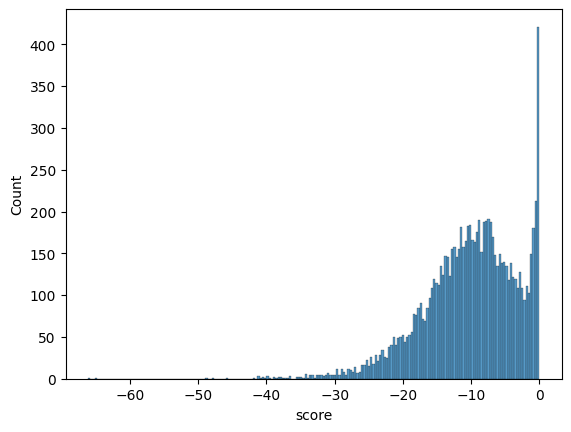

In [8]:
sns.histplot(psmlist.to_dataframe()["score"], bins=200)

In [3]:
import pandas as pd
from pyteomics.mztab import MzTab
import os
from pyteomics import mgf

In [4]:
mgf_file = pd.DataFrame(pd.DataFrame(mgf.read(mgf_path))["params"].tolist())
_ = mgf_file.pop("charge")
result = pd.DataFrame(MzTab(result_path).spectrum_match_table).set_index("PSM_ID").reset_index().reset_index()
run = os.path.basename(result_path)

mgf_file = mgf_file.reset_index()
result["index"] = result.spectra_ref.apply(lambda x: int(x.split("=")[-1]))

In [9]:
result["index"].apply(lambda x: type(x))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
9152    <class 'str'>
9153    <class 'str'>
9154    <class 'str'>
9155    <class 'str'>
9156    <class 'str'>
Name: index, Length: 9157, dtype: object

In [7]:
mgf_file["index"]

0          0
1          1
2          2
3          3
4          4
        ... 
9152    9152
9153    9153
9154    9154
9155    9155
9156    9156
Name: index, Length: 9157, dtype: int64